In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
path = "../data/processed/superstore_clean.csv"
df = pd.read_csv(path)

In [4]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst= False)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst= False)

In [5]:
# 2. Prepare Data for Prophet
# Prophet REQUIRES columns named 'ds' (Date) and 'y' (Target)
monthly_sales = df.set_index('order_date').resample('MS')['sales'].sum().reset_index()
prophet_df = monthly_sales.rename(columns={'order_date': 'ds', 'sales': 'y'})

In [6]:
# 3. Initialize and Train Model
# seasonality_mode='multiplicative' is usually better when the seasonal fluctuations 
# grow as the trend grows (which fits your description of "upward trend")
model = Prophet(interval_width=0.95, seasonality_mode='multiplicative') 
model.fit(prophet_df)

19:23:29 - cmdstanpy - INFO - Chain [1] start processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# 4. Create Future Dates (Forecast Horizon)
# We want to predict the next 12 months
future_dates = model.make_future_dataframe(periods=12, freq='MS')

In [8]:
# 5. Predict
forecast = model.predict(future_dates)

In [9]:
# 6. Visualize
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

           ds           yhat    yhat_lower     yhat_upper
55 2018-08-01   49866.309338  35695.659986   63582.303854
56 2018-09-01   95683.776904  80735.443185  110239.824979
57 2018-10-01   56334.909843  42176.584827   70368.804573
58 2018-11-01  114484.674500  99823.348730  128404.759197
59 2018-12-01   97603.531233  84135.789994  110967.715214


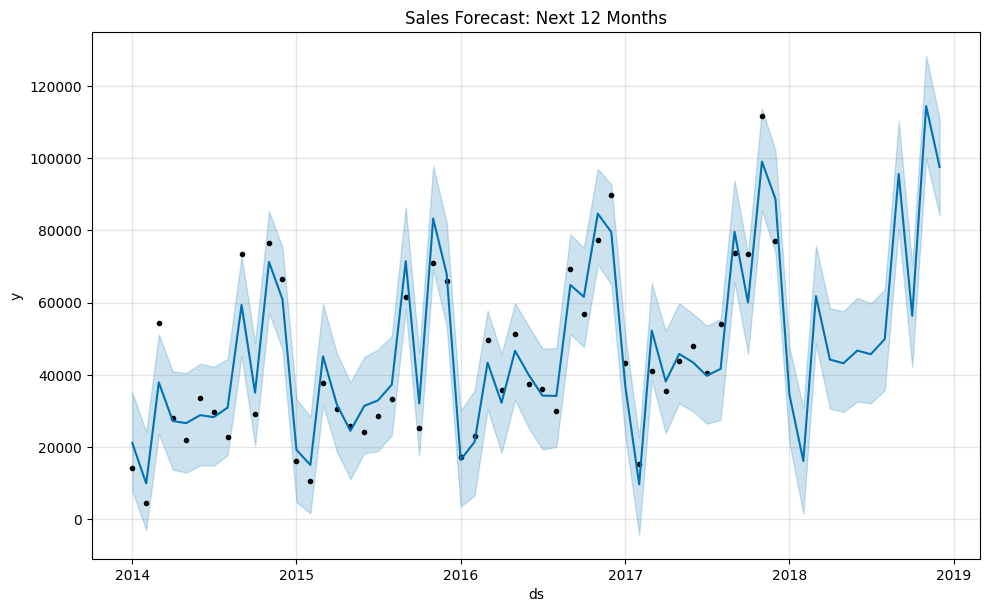

In [12]:
fig1 = model.plot(forecast)
plt.title("Sales Forecast: Next 12 Months")
plt.show()